# Training a Random Forest Classifier

You want to train a classification model using a 'forest' of randomized decision trees.
Train a random forest classification model using scikit-learn's RandomForestClassifier.

In [1]:
# Load Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [2]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [3]:
# Create a random forest classifier objecr
random_forest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [4]:
# Train model
model = random_forest.fit(features, target)

In [5]:
model

RandomForestClassifier(n_jobs=-1, random_state=0)

In [6]:
# make new observation
observation = [[5, 4, 3, 2]]

As we can see by comparing this solution to decision tree, scikit -learn's RandomForestClassifier works similarly to DecisionTreeClassifier.

In [7]:
# predict observation's class
model.predict(observation)

array([1])

RandomForestClassifier also uses many of the same parameters as DecisionTree Classifier . For example, we can change the measure of split quality used.

In [8]:
# create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion='entropy', random_state=0)

In [9]:
# Train model
model_entropy = randomforest_entropy.fit(features, target)
model_entropy.predict(observation)

array([1])

# Training a Random Forest Regressor

You want to train a regressor model using a 'forest' of randomized decision tree.
Train a random forest regression model using scikit-learn's RandomForestRegressor

In [10]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [11]:
# Load data
housing = datasets.fetch_california_housing()
features = housing.data[:,0:2]
target = housing.target

In [12]:
# Create a RandomForestRegressor
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [13]:
# train model
model = randomforest.fit(features, target)

In [14]:
model

RandomForestRegressor(n_jobs=-1, random_state=0)

# Identifying Important Features in Random Forest

You need to know which features are most important in a random forest model. Calculate and visualixe the importance of each feature.

In [15]:
# Load Libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [16]:
# load datasets
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [17]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [18]:
# Train model
model = randomforest.fit(features, target)

In [19]:
# Calculate feature importances
importances = model.feature_importances_

In [20]:
importances

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [21]:
# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

In [22]:
indices

array([2, 3, 0, 1], dtype=int64)

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
names = [iris.feature_names[i] for i in indices]

In [25]:
names

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

In [26]:
features.shape

(150, 4)

In [27]:
features.shape[1]

4

In [28]:
importances[indices]

array([0.46044474, 0.42411627, 0.09090795, 0.02453104])

TypeError: bar() missing 1 required positional argument: 'height'

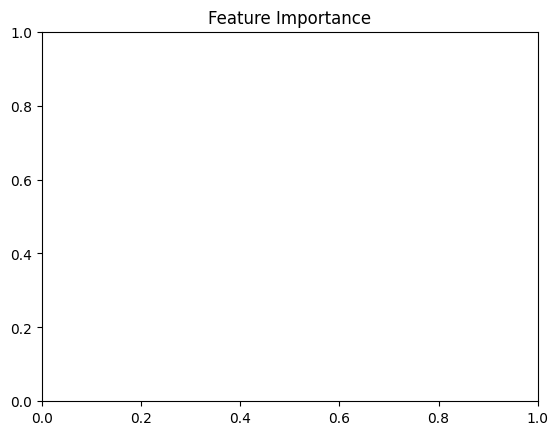

In [34]:
# Create plot
plt.figure()

# crate plot title
plt.title('Feature Importance')

# Add bars
plt.bar((features.shape[1], importances[indices]))

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1], names, rotation = 90))

# Show plot
plt.show()

# Selecting beat features using the Random Forest

You need to conduct feature selection on a random forest
Identify the importance features and retrain the model using only the most important features.

In [35]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

In [36]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [44]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
# Create a random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [40]:
# Create object that selects features with importance greater than or equal to the threshold
selector = SelectFromModel(randomforest, threshold=0.3)

In [41]:
# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

In [43]:
features_important

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [42]:
# Train a random forest using most important features
model = randomforest.fit(features_important, target)

In [45]:
model

RandomForestClassifier(n_jobs=-1, random_state=0)

# Evaluating random Forest with out of bag errors

# Controlling Tree Size

You want to manually determine the structure and size of a decision tree.
Use the tree structure parameters in scikit-learn tree-based learning algorithms.

In [46]:
# load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [47]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [48]:
# Create Decision Tree Classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0)

In [50]:
# Train model
model = decisiontree.fit(features, target)

In [51]:
model

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0,
                       random_state=0)

In [52]:
import sklearn
sklearn.__version__

'1.2.1'

# Evaluating Random Forests with Out-of-Bag Errors

You need to evaluate a random forest model without using a cross-validation. Calculate the model's out-of-bag score.

In [53]:
# Load Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [55]:
# Load data
iris = datasets.load_iris()
fatures = iris.data
target = iris.target

In [56]:
# Create Random tree classifier object
randomforest = RandomForestClassifier(random_state=0,
                                     n_estimators=1000,
                                     oob_score=True,
                                     n_jobs=-1)

In [57]:
# Train model
model = randomforest.fit(features, target)

In [59]:
# View out-of-bag- error
randomforest.oob_score_

0.9533333333333334